# **Entrenamiento de modelo YOLO para detectar objetos y segmentar**


<p align=""><a href="https://ultralytics.com/hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLO11 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLO11 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [ ]:
!pip install roboflow

## **Object Detection**

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="BYz6pHUipfy01u2z5fpy")
project = rf.workspace("projectevelynsanchez").project("clean-yzsmx-o6xw6")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to clean-1 in yolov12:: 100%|██████████| 2240/2240 [00:00<00:00, 4816.50it/s]


In [ ]:
from ultralytics import settings
settings.update({"wandb": False})

import os
os.environ['WANDB_MODE'] = 'disabled'

* Para conocer los hiperparámetros de ajuste, visitar: https://docs.ultralytics.com/modes/train/#apple-m1-and-m2-mps-training
* Para leer sobre optimizadores:
https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-pr%C3%A1ctico-819b39a3eb5

* optimizer	'auto'	Choice of optimizer for training. Options include SGD, Adam, AdamW, NAdam, RAdam, RMSProp etc., or auto for automatic selection based on model configuration. Affects convergence speed and stability.

In [ ]:
from ultralytics import YOLO
model_rod = YOLO('yolo12x.pt')
model_rod.train(
    data='/content/clean-1/data.yaml',  # Ruta al archivo data.yaml
    epochs=20,  # Número de épocas
    imgsz=640,  # Tamaño de la imagen
    batch=8,  # Tamaño del batch
    optimizer='AdamW',  # Especifica el optimizador Adam
    lr0=0.001,  # Tasa de aprendizaje inicial
    momentum=0.9,  # Momento para Adam (típicamente se usa con SGD, pero funciona también aquí)
    weight_decay=0.0005,  # Decaimiento del peso (Weight decay) para evitar sobreajuste
    lrf=0.00001  # Tasa de aprendizaje final (Learning rate final, para programar decay si es necesario)
)

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/clean-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=1e-05, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12x.pt, momentum=0.9, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e71d7fac140>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

El modelo logró:
*   mAP50 = 0.995
*   mAP50-95 = 0.817
*   Precisión = 0.998
*   Recall = 0.998

Estos valores indican buen performance, tanto en la ubicación de los objetos como en la consistencia de las predicciones a diferentes niveles de IoU. El alto mAP50-95 confirma que las cajas generadas por el modelo se ajustan con gran exactitud a las anotaciones del dataset, reflejando una excelente calidad de entrenamiento.

In [ ]:
# Para el dataset de prueba

# Load a YOLO model from a saved checkpoint
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluate the model on the test dataset
metrics_test = model.val(data='/content/clean-1/data.yaml', imgsz=640, save_json=True, split="test")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12x summary (fused): 283 layers, 59,044,499 parameters, 0 gradients, 198.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 27.0±8.0 MB/s, size: 106.8 KB)
val: Scanning /content/clean-1/test/labels... 30 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 30/30 736.9it/s 0.0s
val: New cache created: /content/clean-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8s/it 3.7s
                   all         30         30      0.998          1      0.995      0.806
Speed: 6.3ms preprocess, 96.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Saving /content/runs/detect/val/predictions.json...
Results saved to /content/runs/detect/val


In [ ]:
def get_classes_from_yaml(yaml_path):
    """Extracts class names from a YOLO data.yaml file."""
    import yaml
    with open(yaml_path, 'r') as stream:
        try:
            yaml_data = yaml.safe_load(stream)
            return yaml_data.get('names', [])
        except yaml.YAMLError as exc:
            print(exc)
            return []
yaml_path = '/content/clean-1/data.yaml'
class_labels = get_classes_from_yaml(yaml_path) + ["background"]
print(class_labels)

['plate', 'background']


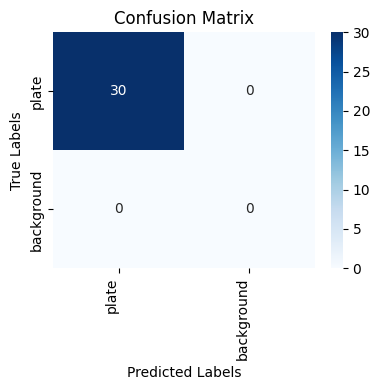

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics_test.confusion_matrix.matrix

plt.figure(figsize=(4, 4))  # Ajusta el tamaño para acomodar las etiquetas
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas para mejor visibilidad
plt.yticks()  # Rotar etiquetas de los ejes Y para mejor visibilidad
plt.tight_layout()  # Ajusta la distribución para que todo quepa bien
plt.show()

In [ ]:
import pandas as pd
import numpy as np
# Función para calcular el reporte de clasificación por clase
def generate_classification_report_per_class(cm, class_labels):
    """
    Generates a classification report with metrics per class.

    Args:
        cm: The confusion matrix.
        class_labels: A list of class labels.

    Returns:
        A pandas DataFrame containing the classification report.
    """
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    report_data = []
    total_samples = np.sum(df_cm.values)
    accuracy = np.trace(df_cm.values) / total_samples  # Exactitud (Accuracy) general

    for i in range(len(class_labels)):
        true_positive = df_cm.iloc[i, i]
        false_positive = df_cm.iloc[:, i].sum() - true_positive
        false_negative = df_cm.iloc[i, :].sum() - true_positive

        # Cálculo de las métricas por clase
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        support = true_positive + false_negative  # Soporte: Número total de muestras por clase
        report_data.append([class_labels[i], true_positive, false_positive, false_negative, precision, recall, f1_score, support])

    report_df = pd.DataFrame(report_data, columns=['Class', 'TP', 'FP', 'FN', 'Precision', 'Recall', 'F1-Score', 'Support'])

    # Calcular los promedios generales (macro) y ponderados (weighted)
    avg_precision = report_df['Precision'].mean()  # Promedio general
    avg_recall = report_df['Recall'].mean()        # Promedio general
    avg_f1 = report_df['F1-Score'].mean()          # Promedio general

    # Promedios ponderados según el soporte
    weighted_precision = np.average(report_df['Precision'], weights=report_df['Support'])
    weighted_recall = np.average(report_df['Recall'], weights=report_df['Support'])
    weighted_f1 = np.average(report_df['F1-Score'], weights=report_df['Support'])

    # Agregar una fila al final con los promedios, sin mover el soporte
    report_df.loc['avg/total'] = ['avg/total', '', '', '', avg_precision, avg_recall, avg_f1, '']
    report_df.loc['wei/total'] = ['wei//total', '', '', '', weighted_precision, weighted_recall, weighted_f1, '']
    report_df.loc['accuracy'] = ['accuracy', '', '', '', accuracy, '', '', total_samples]

    return report_df

# Generar y mostrar el reporte de clasificación
report_df = generate_classification_report_per_class(cm, class_labels)
print(report_df)


                Class    TP   FP   FN  Precision Recall F1-Score Support
0               plate  30.0  0.0  0.0        1.0    1.0      1.0    30.0
1          background   0.0  0.0  0.0        0.0    0.0      0.0     0.0
avg/total   avg/total                        0.5    0.5      0.5        
wei/total  wei//total                        1.0    1.0      1.0        
accuracy     accuracy                        1.0                    30.0


Conclusión:

Este dataset de imágenes de placas de autos entrenado, alcanzó una buena calidad de desempeño en el entrenamiento, con un alto mAP50-95 = 0.817 confirmando que las cajas generadas por el modelo se ajustan con gran exactitud a las anotaciones del dataset. Anteriormente se realizaron pruebas con dataset ruidosos, pero el desempeño alcanzado era bajo, sin embargo, con un dataset con anotaciones uniforme y objetos correctamente emmarcados, tiene un impacto significativo en el desempeño del modelo.

# **2.2 Segmentación**

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="BYz6pHUipfy01u2z5fpy")
project = rf.workspace("projectevelynsanchez").project("bottle-segmentation-y6kus-mlcbg")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bottle-Segmentation-1 in yolov11:: 100%|██████████| 1510/1510 [00:00<00:00, 9782.10it/s]


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from ultralytics import YOLO
model_rod = YOLO('yolo11x-seg.pt')
model_rod.train(
    data='/content/Bottle-Segmentation-1/data.yaml',  # Ruta al archivo data.yaml
    epochs=10,  # Número de épocas
    imgsz=640,  # Tamaño de la imagen
    batch=8,  # Tamaño del batch
    optimizer='AdamW',  # Especifica el optimizador Adam
    lr0=0.001,  # Tasa de aprendizaje inicial
    momentum=0.9,  # Momento para Adam (típicamente se usa con SGD, pero funciona también aquí)
    weight_decay=0.0005,  # Decaimiento del peso (Weight decay) para evitar sobreajuste
    lrf=0.00001  # Tasa de aprendizaje final (Learning rate final, para programar decay si es necesario)
)

Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Bottle-Segmentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=1e-05, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x-seg.pt, momentum=0.9, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, pl

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f53c44df3b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

El modelo logró:
*   mAP50 = 0.965
*   mAP50-95 = 0.933

El modelo YOLO11x-seg logró un desempeño sobresaliente. Alcanzando 0.965 de mAP50 y 0.933 de mAP50-95 en segmentación, con precisión y recall superiores al 93%. Las pérdidas disminuyeron de forma consistente, mostrando un entrenamiento estable y eficiente. El modelo final detecta y segmenta botellas con alta exactitud y generalización sólida

In [ ]:
# prompt: prueba mi modelo en los datos de prueba

# Load a YOLO model from a saved checkpoint
model = YOLO('/content/runs/segment/train/weights/best.pt')

# Evaluate the model on the test dataset
metrics_test = model.val(data='/content/Bottle-Segmentation-1/data.yaml', imgsz=640, save_json=True, split="test")

Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x-seg summary (fused): 203 layers, 62,003,283 parameters, 0 gradients, 295.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 21.3±11.7 MB/s, size: 21.0 KB)
val: Scanning /content/Bottle-Segmentation-1/test/labels... 35 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 35/35 1.3Kit/s 0.0s
val: New cache created: /content/Bottle-Segmentation-1/test/labels.cache
requirements: Ultralytics requirement ['faster-coco-eval>=1.6.7'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 2 packages in 214ms
Prepared 1 package in 40ms
Installed 1 package in 2ms
 + faster-coco-eval==1.7.0

requirements: AutoUpdate success ✅ 0.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1

El modelo obtuvo un buen desempeño en el test set, con precision 0.998, recall 1.0, mAP50 0.995, y mAP50–95 de hasta 0.989 en segmentación. Esto demuestra una generalización excelente y un ajuste extremadamente preciso de las máscaras, validando que el dataset es de alta calidad y que el entrenamiento fue óptimo.

In [ ]:
def get_classes_from_yaml(yaml_path):
    """Extracts class names from a YOLO data.yaml file."""
    import yaml
    with open(yaml_path, 'r') as stream:
        try:
            yaml_data = yaml.safe_load(stream)
            return yaml_data.get('names', [])
        except yaml.YAMLError as exc:
            print(exc)
            return []
yaml_path = '/content/Bottle-Segmentation-1/data.yaml'
class_labels = get_classes_from_yaml(yaml_path) + ["background"]
print(class_labels)

['Bottle', 'background']


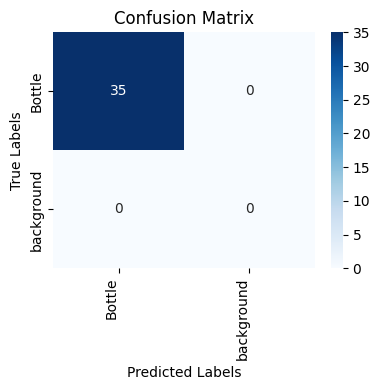

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = metrics_test.confusion_matrix.matrix

plt.figure(figsize=(4, 4))  # Ajusta el tamaño para acomodar las etiquetas
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90, ha='right')  # Rotar etiquetas para mejor visibilidad
plt.yticks()  # Rotar etiquetas de los ejes Y para mejor visibilidad
plt.tight_layout()  # Ajusta la distribución para que todo quepa bien
plt.show()